# This is code for simple GP regression. It assumes a zero mean GP Prior.

In [80]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
N = 10
n = 50

In [82]:
# Define the kernel
def kernel(a, b, lambda_, l):
    """ GP squared exponential kernel """
#     print(np.sum(a**2,1).reshape(-1,1), '\n')
#     print(np.sum(b**2,1), '\n')
#     print(2*np.dot(a, b.T), '\n')
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return lambda_**2 * np.exp(-.5 * (1/l**2) * sqdist)

In [83]:
# Setup of the problem
X = np.array([-2.26, -1.31, -0.43, 0.32, 0.34, 0.54, 0.86, 1.83, 2.77, 3.58]).reshape(-1,1)
y = np.array([1.03, 0.70, -0.68, -1.36, -1.74, -1.01, 0.24, 1.55, 1.68, 1.53]).reshape(-1,1)
sigma_2 = 0.5
lambda_ = 1
l = 0.5

In [84]:
X

array([[-2.26],
       [-1.31],
       [-0.43],
       [ 0.32],
       [ 0.34],
       [ 0.54],
       [ 0.86],
       [ 1.83],
       [ 2.77],
       [ 3.58]])

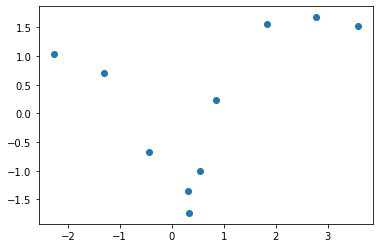

In [85]:
plt.scatter(X,y)

In [86]:
K = kernel(X, X, lambda_, l)
L = np.linalg.cholesky(K + sigma_2*np.eye(X.size))
pd.DataFrame(L)

,0,1,2,3,4,5,6,7,8,9
0,1.224745e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1,1.342928e-01,1.217360e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
2,1.007249e-03,1.744493e-01,1.212257e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3,1.349829e-06,4.043998e-03,2.672264e-01,1.195230e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
4,1.097218e-06,3.546767e-03,2.515003e-01,7.797485e-01,9.103446e-01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
5,1.265368e-07,8.746379e-04,1.255205e-01,7.314006e-01,3.528733e-01,9.081726e-01,0.000000e+00,0.000000,0.000000,0.000000
6,2.862609e-09,6.675447e-05,2.956960e-02,4.603363e-01,2.371615e-01,4.302271e-01,1.022680e+00,0.000000,0.000000,0.000000
7,2.410523e-15,2.242029e-09,3.019922e-05,8.744677e-03,5.456544e-03,3.031634e-02,1.309816e-01,1.217300,0.000000,0.000000
8,8.627240e-23,2.855628e-15,1.052093e-09,5.114739e-06,3.781972e-06,4.718585e-05,6.400422e-04,0.140249,1.216688,0.000000
9,1.941809e-30,1.395709e-21,8.900368e-15,4.915083e-10,4.159407e-10,9.786339e-09,3.620801e-07,0.001797,0.221072,1.204626


In [87]:
# points we're going to make predictions at.
Xtest = np.linspace(-4, 4, 50).reshape(-1,1)
Xtest

array([[-4.        ],
       [-3.83673469],
       [-3.67346939],
       [-3.51020408],
       [-3.34693878],
       [-3.18367347],
       [-3.02040816],
       [-2.85714286],
       [-2.69387755],
       [-2.53061224],
       [-2.36734694],
       [-2.20408163],
       [-2.04081633],
       [-1.87755102],
       [-1.71428571],
       [-1.55102041],
       [-1.3877551 ],
       [-1.2244898 ],
       [-1.06122449],
       [-0.89795918],
       [-0.73469388],
       [-0.57142857],
       [-0.40816327],
       [-0.24489796],
       [-0.08163265],
       [ 0.08163265],
       [ 0.24489796],
       [ 0.40816327],
       [ 0.57142857],
       [ 0.73469388],
       [ 0.89795918],
       [ 1.06122449],
       [ 1.2244898 ],
       [ 1.3877551 ],
       [ 1.55102041],
       [ 1.71428571],
       [ 1.87755102],
       [ 2.04081633],
       [ 2.20408163],
       [ 2.36734694],
       [ 2.53061224],
       [ 2.69387755],
       [ 2.85714286],
       [ 3.02040816],
       [ 3.18367347],
       [ 3

In [88]:
# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest,lambda_,l))
mu = np.dot(Lk.T, np.linalg.solve(L, y))
mu

array([[ 0.00149989],
       [ 0.00443061],
       [ 0.01176547],
       [ 0.02808919],
       [ 0.06030174],
       [ 0.11644555],
       [ 0.20238634],
       [ 0.31694814],
       [ 0.44815263],
       [ 0.57421903],
       [ 0.67096766],
       [ 0.72252375],
       [ 0.72837441],
       [ 0.70114681],
       [ 0.65610119],
       [ 0.59996743],
       [ 0.52727488],
       [ 0.42601291],
       [ 0.28697153],
       [ 0.10901661],
       [-0.10270696],
       [-0.34158281],
       [-0.60010891],
       [-0.86285617],
       [-1.09684288],
       [-1.25048719],
       [-1.26909107],
       [-1.12204773],
       [-0.82430946],
       [-0.43482906],
       [-0.03045505],
       [ 0.32740371],
       [ 0.61117098],
       [ 0.82199264],
       [ 0.9717109 ],
       [ 1.06979681],
       [ 1.12364707],
       [ 1.14565587],
       [ 1.15497652],
       [ 1.16981207],
       [ 1.19751802],
       [ 1.23230817],
       [ 1.26201915],
       [ 1.27613825],
       [ 1.26739748],
       [ 1

In [92]:
np.sum(Lk**2, axis=0)

array([3.71332287e-06, 3.23921315e-05, 2.28291472e-04, 1.29986983e-03,
       5.97923678e-03, 2.22169234e-02, 6.66714081e-02, 1.61545512e-01,
       3.15939118e-01, 4.98710271e-01, 6.36635219e-01, 6.64347789e-01,
       5.90945569e-01, 5.05654254e-01, 4.99556096e-01, 5.78214919e-01,
       6.59239763e-01, 6.62154257e-01, 5.95934080e-01, 5.45614379e-01,
       5.71831258e-01, 6.42965803e-01, 6.83399844e-01, 6.74807049e-01,
       6.75082077e-01, 7.31451070e-01, 8.14305218e-01, 8.61167124e-01,
       8.51271909e-01, 8.01650724e-01, 7.19703199e-01, 6.08679211e-01,
       5.09336526e-01, 4.86125032e-01, 5.54428983e-01, 6.45422447e-01,
       6.66848384e-01, 5.98863342e-01, 5.16117353e-01, 5.07834112e-01,
       5.82310078e-01, 6.60729384e-01, 6.67899336e-01, 6.17094111e-01,
       5.87945638e-01, 6.22993705e-01, 6.70860449e-01, 6.44026394e-01,
       5.14235611e-01, 3.33402718e-01])

In [89]:
# compute the variance at our test points.
K_ = kernel(Xtest, Xtest, lambda_, l)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)
s

array([0.99999814, 0.9999838 , 0.99988585, 0.99934985, 0.9970059 ,
       0.98882914, 0.96608933, 0.91567161, 0.82707973, 0.70801817,
       0.60279746, 0.579355  , 0.63957363, 0.70309725, 0.7074206 ,
       0.64944983, 0.58374672, 0.58124499, 0.6356618 , 0.67408132,
       0.65434604, 0.59752339, 0.56267233, 0.57025692, 0.57001572,
       0.51821707, 0.43092317, 0.37260284, 0.38565281, 0.44536421,
       0.52943064, 0.62555638, 0.70047375, 0.71685073, 0.66751106,
       0.59546415, 0.57719288, 0.6333535 , 0.69561674, 0.70154536,
       0.64628935, 0.58246941, 0.57628176, 0.6187939 , 0.64191461,
       0.61400838, 0.57370685, 0.59663524, 0.696968  , 0.81645409])

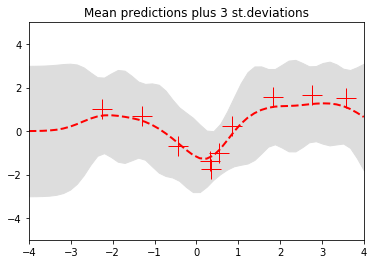

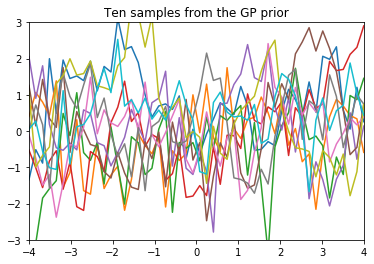

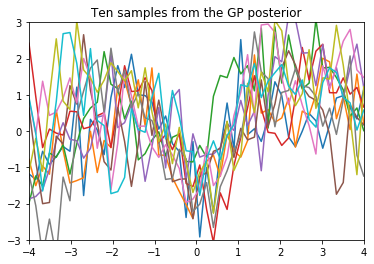

In [90]:
# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'r+', ms=20)
# plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu.flat-3*s, mu.flat+3*s, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-4, 4, -5, 5])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 0.5*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-4, 4, -3, 3])
plt.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 0.5*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-4, 4, -3, 3])
plt.savefig('post.png', bbox_inches='tight')

plt.show()

In [78]:
np.sum(X**2,1).reshape(-1,1)

array([[ 5.1076],
       [ 1.7161],
       [ 0.1849],
       [ 0.1024],
       [ 0.1156],
       [ 0.2916],
       [ 0.7396],
       [ 3.3489],
       [ 7.6729],
       [12.8164]])

In [79]:
np.sum(X**2,1)

array([ 5.1076,  1.7161,  0.1849,  0.1024,  0.1156,  0.2916,  0.7396,
        3.3489,  7.6729, 12.8164])

In [63]:
np.sum(X**2,1).reshape(-1,1)+np.sum(X**2,1)

array([[10.2152,  6.8237,  5.2925,  5.21  ,  5.2232,  5.3992,  5.8472,
         8.4565, 12.7805, 17.924 ],
       [ 6.8237,  3.4322,  1.901 ,  1.8185,  1.8317,  2.0077,  2.4557,
         5.065 ,  9.389 , 14.5325],
       [ 5.2925,  1.901 ,  0.3698,  0.2873,  0.3005,  0.4765,  0.9245,
         3.5338,  7.8578, 13.0013],
       [ 5.21  ,  1.8185,  0.2873,  0.2048,  0.218 ,  0.394 ,  0.842 ,
         3.4513,  7.7753, 12.9188],
       [ 5.2232,  1.8317,  0.3005,  0.218 ,  0.2312,  0.4072,  0.8552,
         3.4645,  7.7885, 12.932 ],
       [ 5.3992,  2.0077,  0.4765,  0.394 ,  0.4072,  0.5832,  1.0312,
         3.6405,  7.9645, 13.108 ],
       [ 5.8472,  2.4557,  0.9245,  0.842 ,  0.8552,  1.0312,  1.4792,
         4.0885,  8.4125, 13.556 ],
       [ 8.4565,  5.065 ,  3.5338,  3.4513,  3.4645,  3.6405,  4.0885,
         6.6978, 11.0218, 16.1653],
       [12.7805,  9.389 ,  7.8578,  7.7753,  7.7885,  7.9645,  8.4125,
        11.0218, 15.3458, 20.4893],
       [17.924 , 14.5325, 13.0013, 12